# Diabetes Prediction Dataset

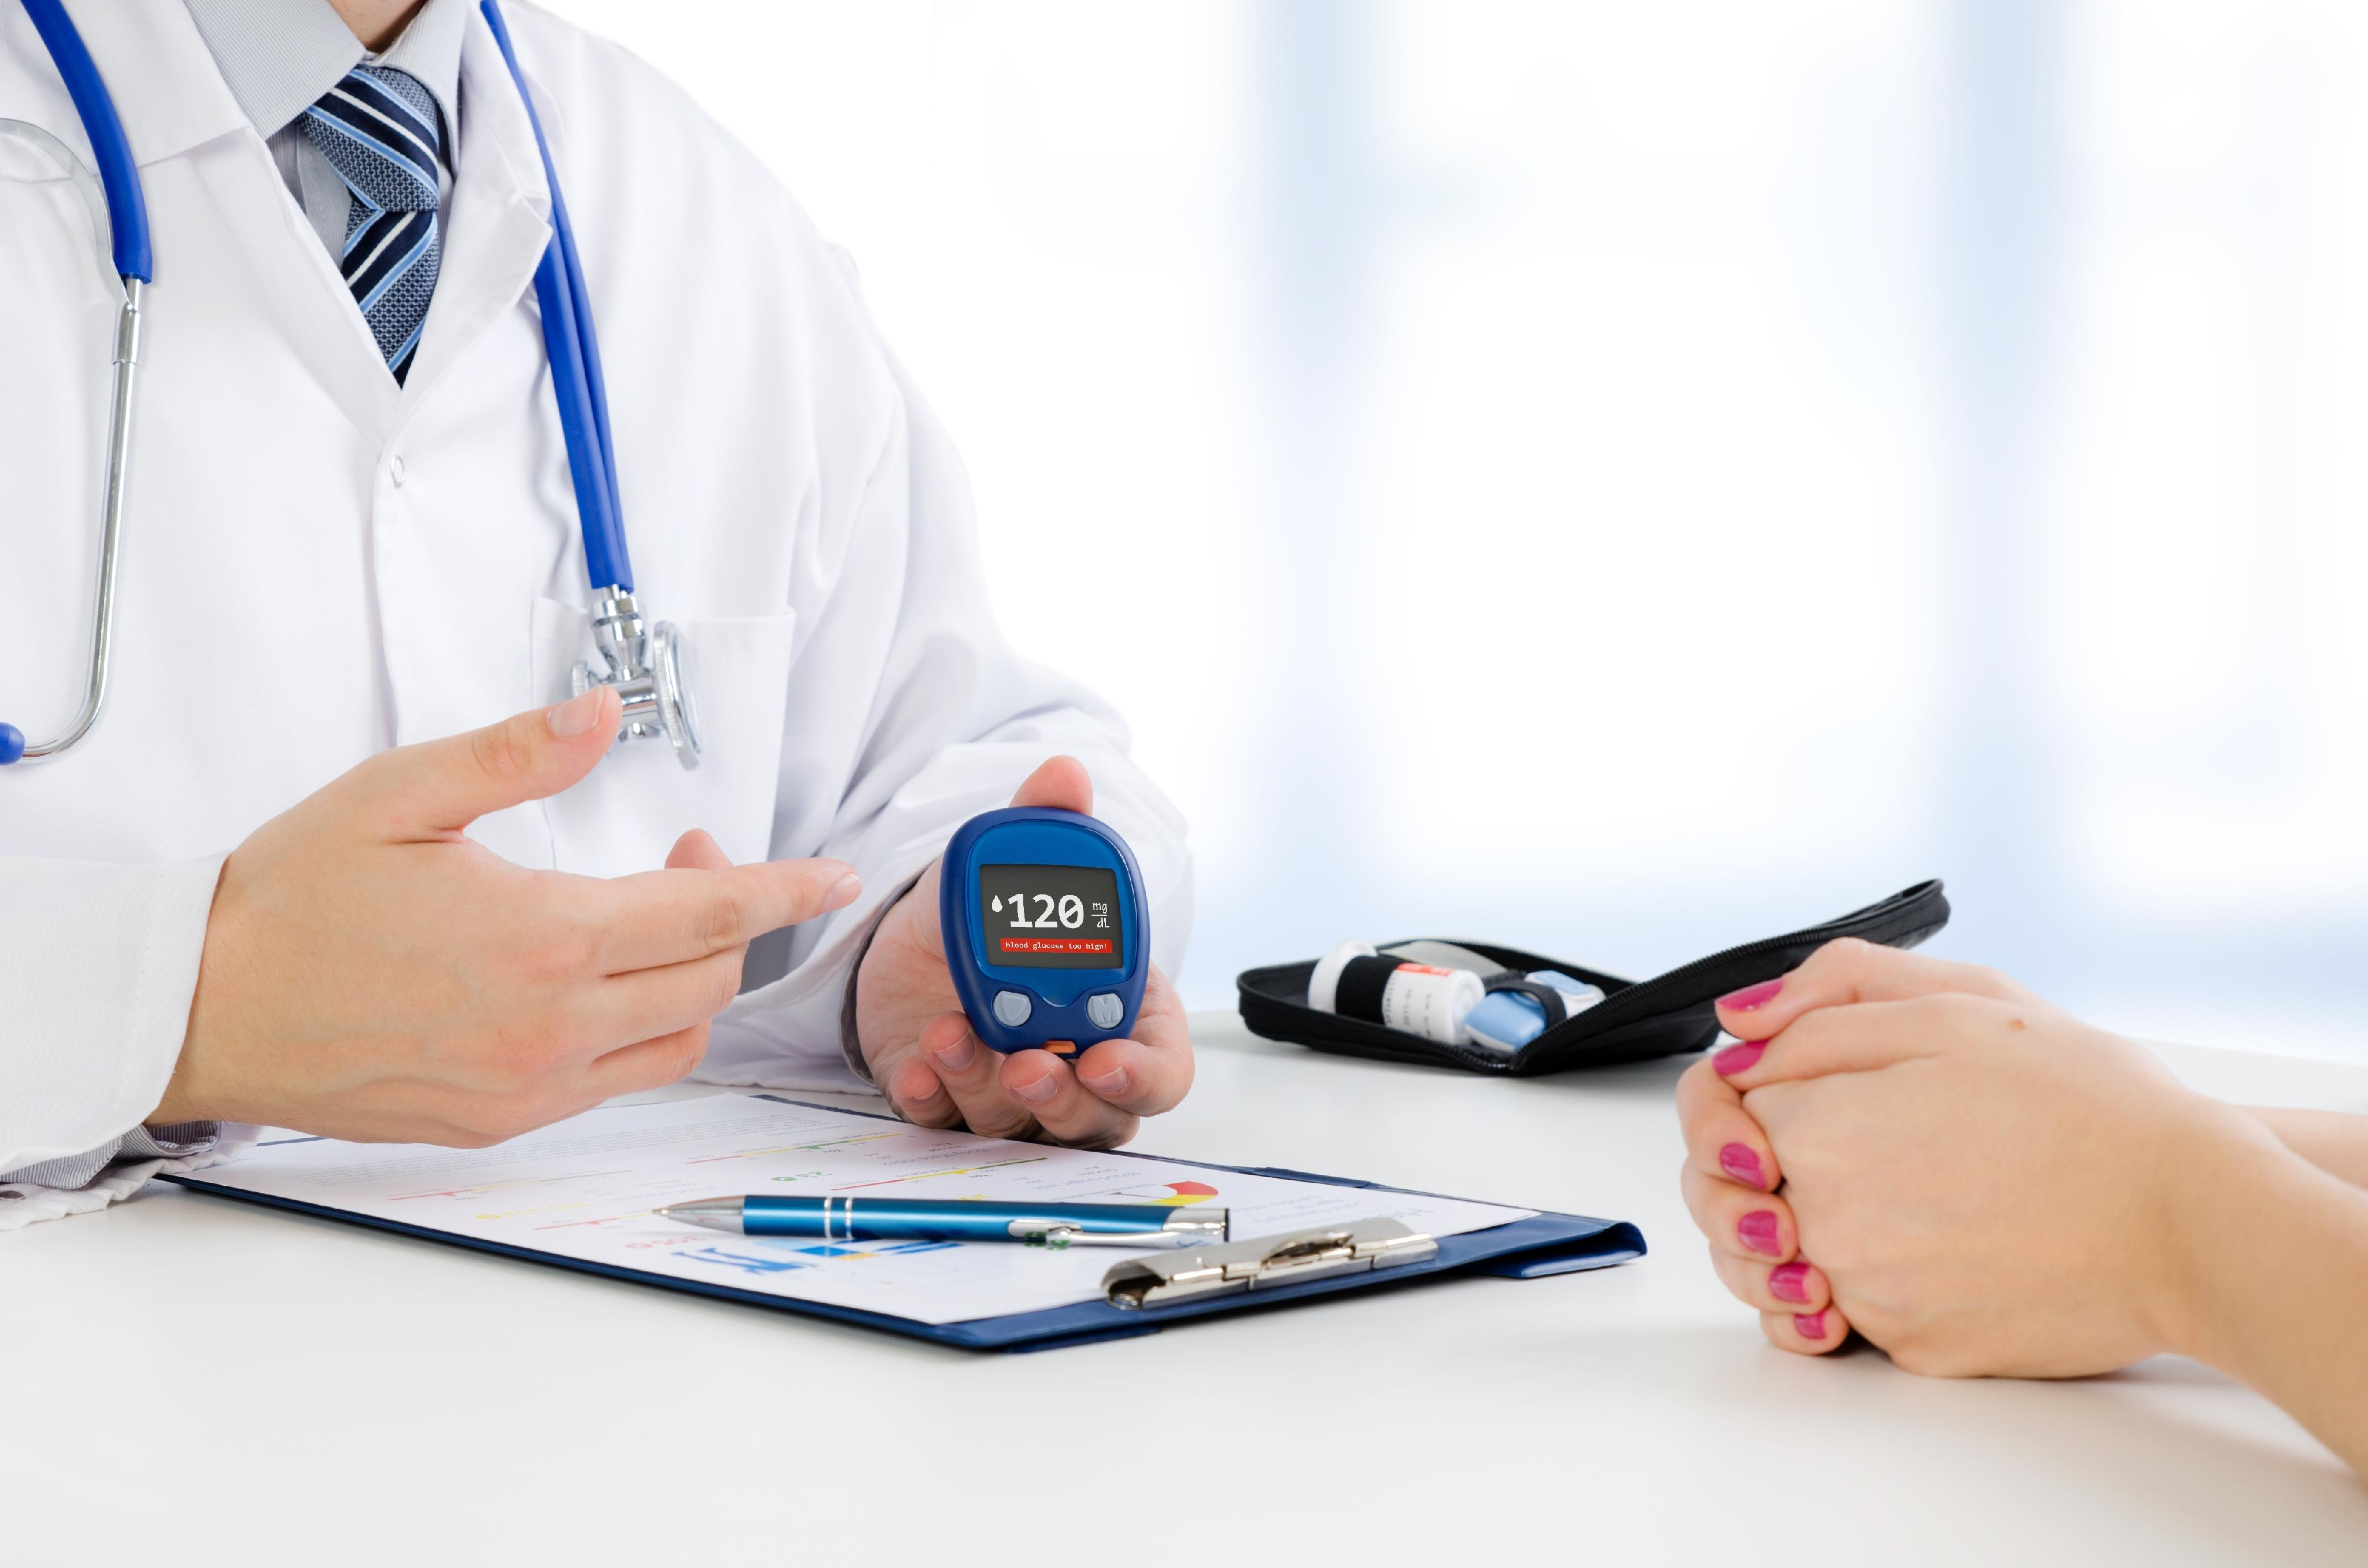

In [1]:
from IPython.display import Image, display

display(Image(filename="Download.jpeg", width=800))

**Description:**

Welcome to the Diabetes Prediction Dataset, a valuable resource for researchers, data scientists, and medical professionals interested in the field of diabetes risk assessment and prediction. This dataset contains a diverse range of health-related attributes, meticulously collected to aid in the development of predictive models for identifying individuals at risk of diabetes. By sharing this dataset, we aim to foster collaboration and innovation within the data science community, leading to improved early diagnosis and personalized treatment strategies for diabetes.

**Columns:**
* **Id:** Unique identifier for each data entry.
* **Pregnancies:** Number of times pregnant.
* **Glucose:** Plasma glucose concentration over 2 hours in an oral glucose tolerance test.
* **BloodPressure:** Diastolic blood pressure (mm Hg).
* **SkinThickness:** Triceps skinfold thickness (mm).
* **Insulin:** 2-Hour serum insulin (mu U/ml).
* **BMI:** Body mass index (weight in kg / height in m^2).
* **DiabetesPedigreeFunction:** Diabetes pedigree function, a genetic score of diabetes.
* **Age:** Age in years.
* **Outcome:** Binary classification indicating the presence (1) or absence (0) of diabetes.

### 📘 Importing Required Libraries
We begin by importing all necessary libraries for data manipulation, visualization, and machine learning.

In [2]:
# Data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

# Machine Learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Model evaluation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_val_predict, learning_curve
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve, f1_score

# Preprocessing
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler, scale

# Warnings
import warnings
warnings.filterwarnings('ignore')

### 📥 Loading the Dataset
We load the diabetes dataset and drop any missing values to ensure data quality.

In [3]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### 📊 Exploratory Data Analysis
Visualizing the distribution of each feature to understand the data better.

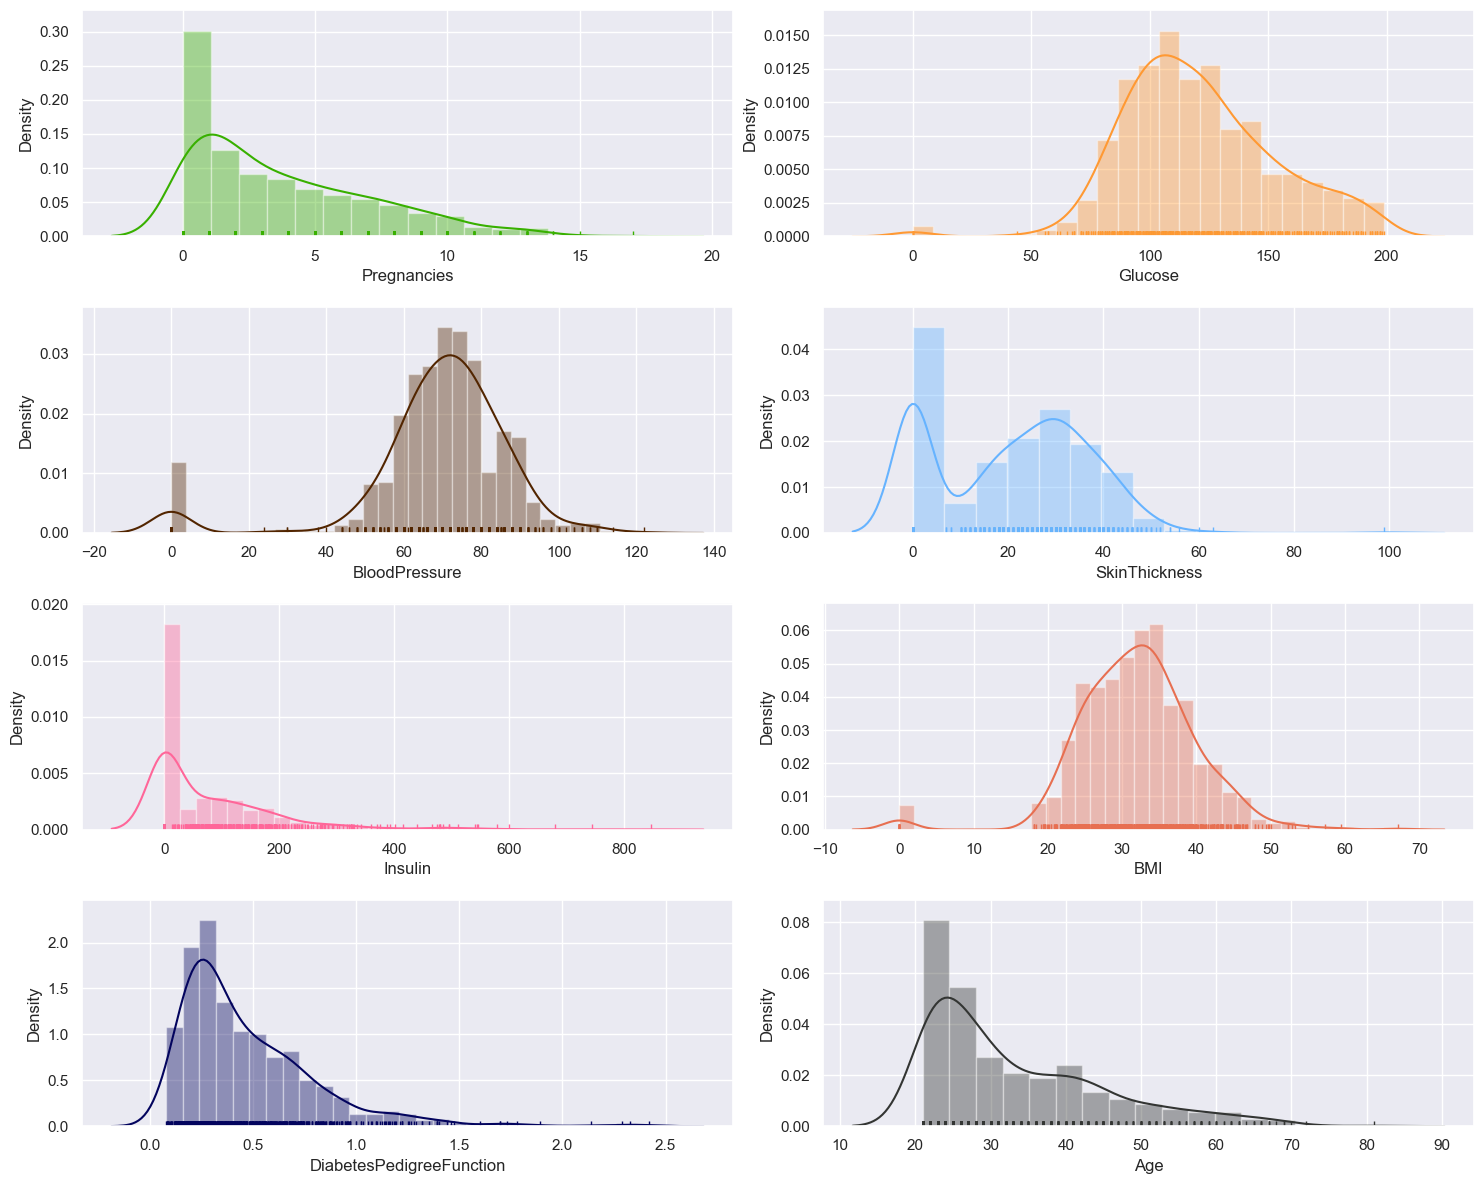

In [7]:
fig, axs = plt.subplots(4, 2, figsize=(15,12))
axs = axs.flatten()
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
colors = ['#38b000', '#FF9933', '#522500', '#66b3ff', '#FF6699', '#e76f51', '#03045e', '#333533']

for i, feature in enumerate(features):
    sns.distplot(df[feature], rug=True, color=colors[i], ax=axs[i])
plt.tight_layout()

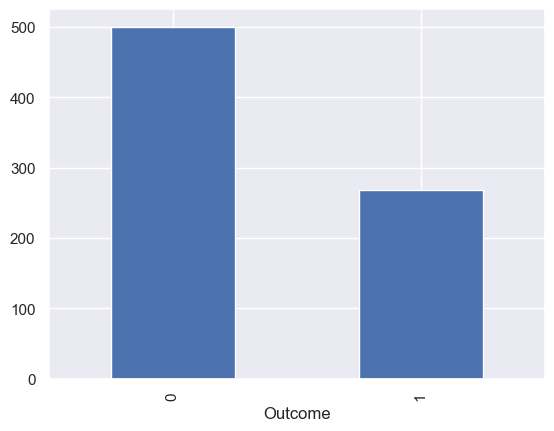

In [8]:
df["Outcome"].value_counts().plot(kind="bar");

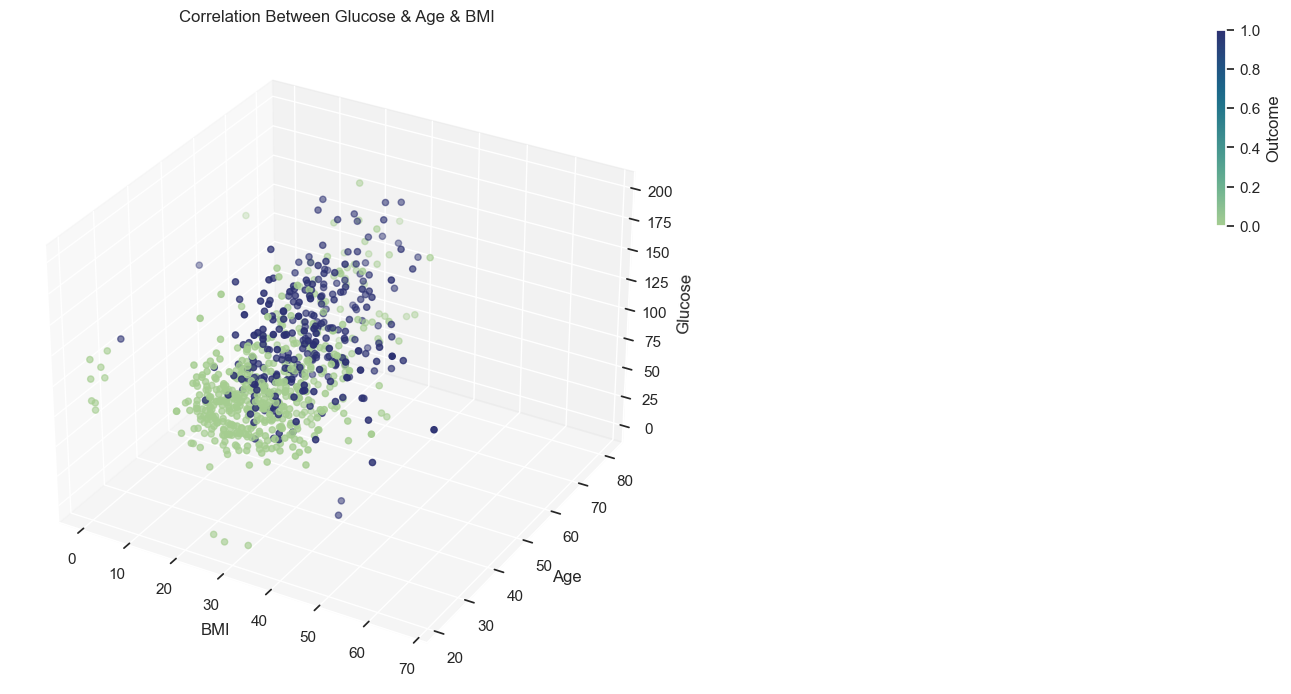

In [9]:
fig = plt.figure(figsize=(15, 8.5),dpi=100)
ax = fig.add_subplot(111,projection='3d')
p1 = ax.scatter(df['BMI'], df['Age'], df['Glucose'],c=df['Outcome'],cmap='crest')
fig.colorbar(p1, shrink=0.3,label='Outcome',anchor=(3,1))
ax.set_xlabel("BMI")
ax.set_ylabel("Age")
ax.set_zlabel("Glucose")
ax.set_title("Correlation Between Glucose & Age & BMI",fontdict={'fontsize': 12})
ax.patch.set_facecolor("white")

### 🧹 Handling Outliers
We replace extreme BMI values and visualize outliers using boxplots.

Text(0.5, 1.0, 'Checking for Outliers')

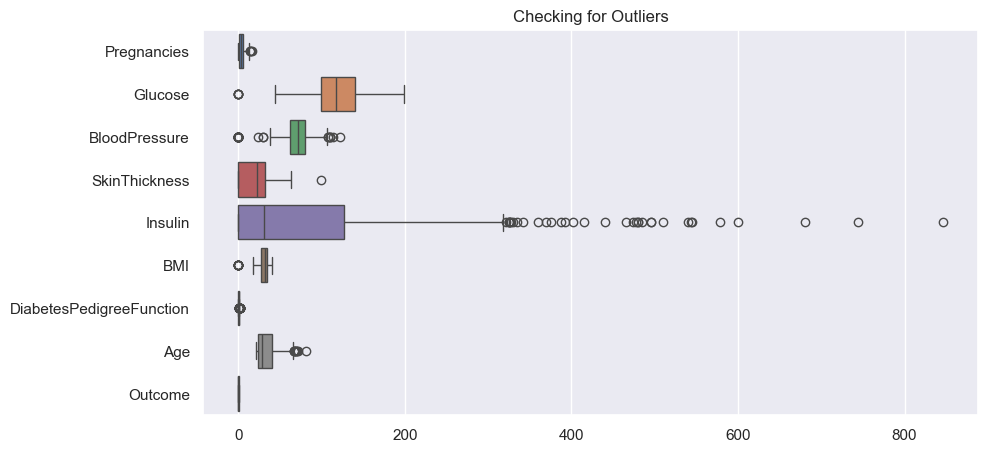

In [10]:
df["BMI"] = df["BMI"].apply(lambda x: df["BMI"].mean() if x > 40 else x)

plt.figure(figsize=(10,5))
sns.boxplot(data=df, orient="h")
plt.title("Checking for Outliers")

### 📈 Correlation Analysis
Understanding relationships between features using a heatmap.

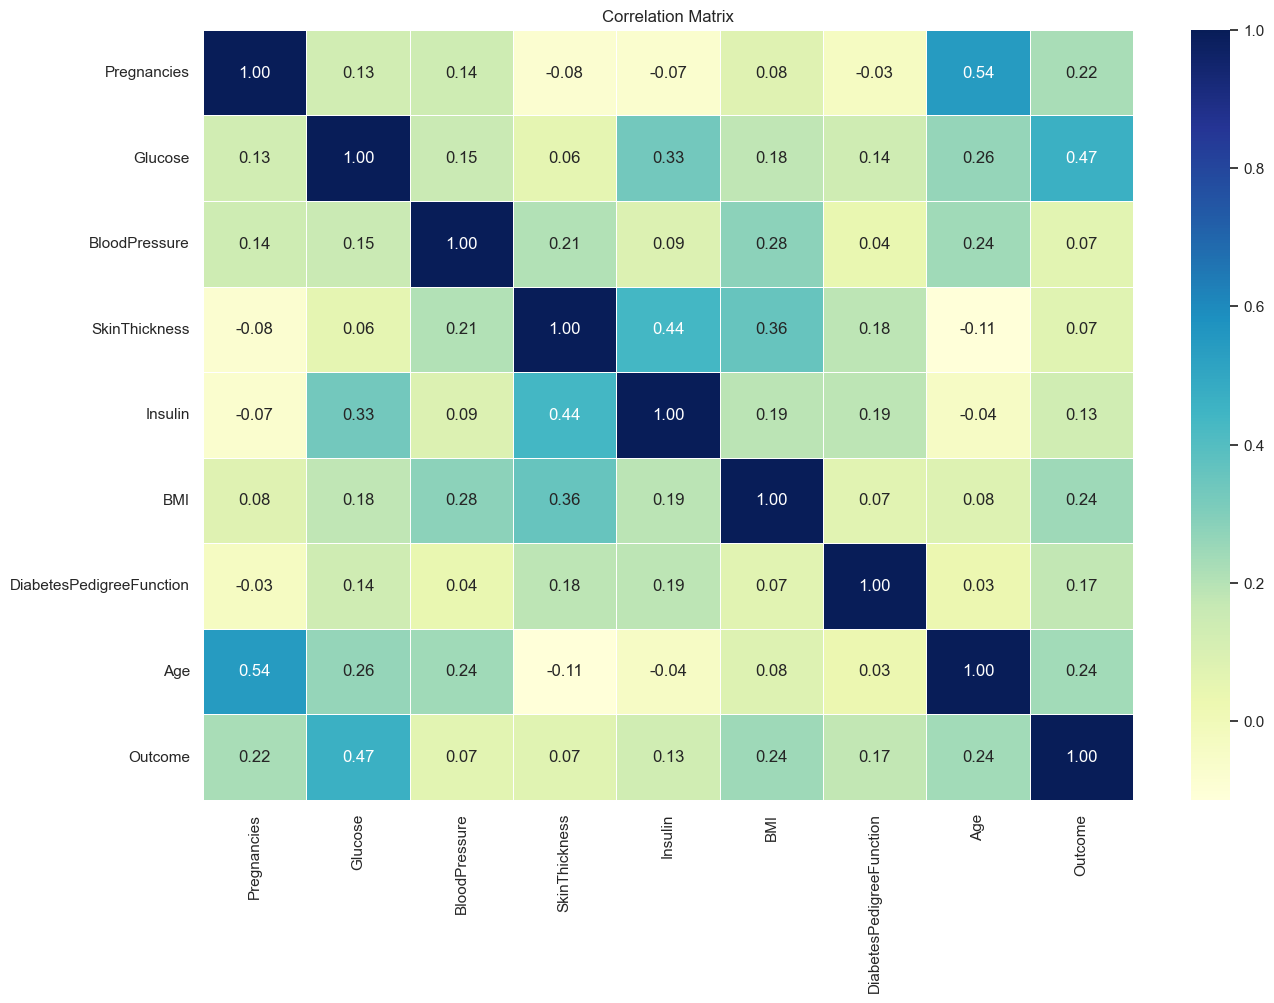

In [11]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu")
plt.title("Correlation Matrix")
plt.show()

### 🧪 Data Cleaning for Modeling
Removing rows with zero values in critical features like Insulin and Glucose.

In [12]:
diabetes_cleaned = df[(df['Insulin'] != 0) & (df['Glucose'] != 0)]

### 📐 Splitting the Dataset
We split the cleaned dataset into training and testing sets.

In [13]:
X = diabetes_cleaned.drop("Outcome", axis=1)
y = diabetes_cleaned["Outcome"]
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Trees": DecisionTreeClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGB": XGBClassifier()
}

def fit_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

model_scores = fit_score(models, X_train, X_test, y_train, y_test)
model_scores

{'Logistic Regression': 0.8227848101265823,
 'Decision Trees': 0.759493670886076,
 'SVM': 0.7974683544303798,
 'KNN': 0.7721518987341772,
 'Random Forest': 0.759493670886076,
 'Gradient Boosting': 0.759493670886076,
 'XGB': 0.7721518987341772}

### Hyperparameter Tuning

In [15]:
from sklearn.model_selection import GridSearchCV

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

grid_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='accuracy')
grid_lr.fit(X_train, y_train)
print("Best parameters for Logistic Regression:", grid_lr.best_params_)

Best parameters for Logistic Regression: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


In [16]:
best_model = grid_lr.best_estimator_
y_pred = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7848101265822784


In [17]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)
print("Best parameters for Random Forest:", grid_rf.best_params_)

Best parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [18]:
best_model = grid_rf.best_estimator_
y_pred = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7721518987341772


In [19]:
from xgboost import XGBClassifier

param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

grid_xgb = GridSearchCV(XGBClassifier(), param_grid_xgb, cv=5, scoring='accuracy')
grid_xgb.fit(X_train, y_train)
print("Best parameters for XGBoost:", grid_xgb.best_params_)

Best parameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}


In [20]:
best_model = grid_xgb.best_estimator_
y_pred = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7468354430379747


# Great Job!!